<a href="https://colab.research.google.com/github/Raziel-JKM/Practice/blob/main/ai/EX-1/rock_scissor_paper_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#가위바위보 분류기

In [1]:
from PIL import Image
import os, glob

#1. 이미지 사이즈 변경

In [2]:
#이미지의 크기가 28x28  변경
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path1 = "/content/drive/MyDrive/Data/train/scissor"
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path1)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path2 = "/content/drive/MyDrive/Data/train/rock"
resize_images(image_dir_path2)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path3 = "/content/drive/MyDrive/Data/train/paper"
resize_images(image_dir_path3)

print("보 이미지 resize 완료!")

400  images to be resized.
400  images resized.
가위 이미지 resize 완료!
400  images to be resized.
400  images resized.
바위 이미지 resize 완료!
400  images to be resized.
400  images resized.
보 이미지 resize 완료!


- 데이터 셋 100개로는 부족해서 

In [3]:
#가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링
import numpy as np

def load_data(img_path, number_of_data=1600):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


In [4]:
image_dir_path = "/content/drive/MyDrive/Data/train/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1200 입니다.
x_train shape: (1600, 28, 28, 3)
y_train shape: (1600,)


라벨:  0


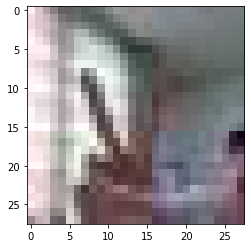

In [5]:
#잘 적용 되었는지 출력
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [6]:
print(x_train.shape)

(1600, 28, 28, 3)


In [7]:
from sklearn.model_selection import train_test_split
#train 데이터를 훈련셋 검증셋 80%, 20%로 랜덤하게 변경
x_train, x_val, y_train, y_val = train_test_split(x_train_norm, y_train, test_size=0.2, shuffle=True, random_state=12)

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(1280, 28, 28, 3) (320, 28, 28, 3) (1280,) (320,)


#네트워크 설계

In [25]:
#이미지 제너레이터
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/train',
                                                 target_size = (28, 28),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/test',
                                                 target_size = (28 , 28),
                                                  batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 1200 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [9]:
import tensorflow as tf
# Initialising the CNN
model = tf.keras.models.Sequential()

# Step 1 - Convolution
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 3]))
# Step 2 - Pooling
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Adding convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.4))
# Step 3 - Flattening
model.add(tf.keras.layers.Flatten())
# Step 4 - Full Connection
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Step 5 - Output Layer
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
# Compiling the CNN
model.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [10]:
result  = model.fit(x = train_gen, validation_data = val_gen, epochs = 100)

Epoch 1/100
38/38 [==============================] - 4s 86ms/step - loss: 5.8565 - accuracy: 0.3700
Epoch 2/100
38/38 [==============================] - 3s 89ms/step - loss: 1.0854 - accuracy: 0.4350
Epoch 3/100
38/38 [==============================] - 3s 87ms/step - loss: 1.0569 - accuracy: 0.4642
Epoch 4/100
38/38 [==============================] - 3s 87ms/step - loss: 1.0423 - accuracy: 0.4542
Epoch 5/100
38/38 [==============================] - 3s 86ms/step - loss: 1.0213 - accuracy: 0.4758
Epoch 6/100
38/38 [==============================] - 3s 88ms/step - loss: 0.9717 - accuracy: 0.5233
Epoch 7/100
38/38 [==============================] - 3s 89ms/step - loss: 0.9573 - accuracy: 0.5400
Epoch 8/100
38/38 [==============================] - 3s 88ms/step - loss: 0.9181 - accuracy: 0.5808
Epoch 9/100
38/38 [==============================] - 3s 89ms/step - loss: 0.9244 - accuracy: 0.5833
Epoch 10/100
38/38 [==============================] - 3s 90ms/step - loss: 0.9269 - accuracy: 0.5717